In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('project3_file.csv')

In [4]:
df.sample(5)

,Machine_ID,Date,Spindle_Speed_RPM,Vibration_Level (mm/s),Temperature (°C),Operation_Hours,Machine_Status,Predicted_Failure,Failure_Date,Failure_Type,...,Next_Schedule_Maintenance_Date,Maintenance_Type,Technician_Name,Maintenance_Comments,Usage_Date,Parts_Produced,Production_Quality,Rejection_Rate,Idle_Time,Operation_name
11,CNC017,2024-09-04 00:00:00,3750.0,1.7,86.0,9.0,Running,Yes,2024-08-25 00:00:00,Overheating,...,2024-09-25 00:00:00,Vibration Control,Technician Q,Adjusted vibration damping,2024-09-04 00:00:00,137.0,Medium,3.0,1.2,Operator Q
13,CNC019,2024-09-04 00:00:00,4150.0,3.0,87.0,12.0,Running,Yes,2024-07-31 00:00:00,Electrical Failure,...,2024-09-20 00:00:00,Electrical System,Technician S,Checked electrical components,2024-09-04 00:00:00,143.0,Low,4.1,1.3,Operator S
29,CNC035,2024-09-07 00:00:00,4750.0,3.2,91.0,11.0,Running,Yes,2024-08-04 00:00:00,Spindle Breakdown,...,2024-09-23 00:00:00,Spindle Inspection,Technician I,Checked spindle alignment,2024-09-07 00:00:00,155.0,High,1.7,0.6,Operator I
15,CNC021,2024-09-05 00:00:00,4550.0,2.3,81.0,10.0,Running,No,2024-08-19 00:00:00,Motor Failure,...,2024-09-15 00:00:00,Routine Inspection,Technician U,"Routine oiling, checked bearings",2024-09-05 00:00:00,151.0,High,1.2,0.3,Operator U
1,CNC007,2024-09-02 00:00:00,3700.0,2.0,84.0,9.0,Running,Yes,2024-08-22 00:00:00,Overheating,...,2024-09-17 00:00:00,Vibration Control,Technician G,Adjusted vibration damping,2024-09-02 00:00:00,138.0,Medium,2.9,1.1,Operator G


In [5]:
df.columns

Index(['Machine_ID', 'Date', 'Spindle_Speed_RPM', 'Vibration_Level (mm/s)',
       'Temperature (°C)', 'Operation_Hours', 'Machine_Status',
       'Predicted_Failure', 'Failure_Date', 'Failure_Type', 'Downtime_Hours',
       'Repair_Time (hours)', 'Issue_Resolved_By', 'Comments',
       'Last_Maintenance_Date', 'Next_Schedule_Maintenance_Date',
       'Maintenance_Type', 'Technician_Name', 'Maintenance_Comments',
       'Usage_Date', 'Parts_Produced', 'Production_Quality', 'Rejection_Rate',
       'Idle_Time', 'Operation_name'],
      dtype='object')

In [6]:
df.describe()

,Spindle_Speed_RPM,Vibration_Level (mm/s),Temperature (°C),Operation_Hours,Downtime_Hours,Repair_Time (hours),Parts_Produced,Rejection_Rate,Idle_Time
count,35.000000,35.000000,35.000000,35.00000,35.00000,35.00000,35.000000,35.000000,35.000000
mean,4251.428571,2.582857,84.828571,10.00000,6.00000,4.00000,149.514286,2.391429,0.762857
std,343.957443,0.514202,4.362175,1.43486,1.43486,1.43486,10.413146,1.152075,0.398590
min,3600.000000,1.700000,77.000000,8.00000,4.00000,2.00000,133.000000,1.200000,0.300000
25%,4050.000000,2.150000,82.000000,9.00000,5.00000,3.00000,139.500000,1.500000,0.400000
50%,4350.000000,2.600000,84.000000,10.00000,6.00000,4.00000,151.000000,1.700000,0.600000
75%,4500.000000,3.050000,88.500000,11.00000,7.00000,5.00000,157.500000,3.150000,1.150000
max,4750.000000,3.400000,93.000000,12.00000,8.00000,6.00000,167.000000,4.500000,1.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Machine_ID                      35 non-null     object 
 1   Date                            35 non-null     object 
 2   Spindle_Speed_RPM               35 non-null     float64
 3   Vibration_Level (mm/s)          35 non-null     float64
 4   Temperature (°C)                35 non-null     float64
 5   Operation_Hours                 35 non-null     float64
 6   Machine_Status                  35 non-null     object 
 7   Predicted_Failure               35 non-null     object 
 8   Failure_Date                    35 non-null     object 
 9   Failure_Type                    35 non-null     object 
 10  Downtime_Hours                  35 non-null     float64
 11  Repair_Time (hours)             35 non-null     float64
 12  Issue_Resolved_By               35 non

identifying null values and handling them

In [8]:
df.isna().sum()

Machine_ID                        1
Date                              1
Spindle_Speed_RPM                 1
Vibration_Level (mm/s)            1
Temperature (°C)                  1
Operation_Hours                   1
Machine_Status                    1
Predicted_Failure                 1
Failure_Date                      1
Failure_Type                      1
Downtime_Hours                    1
Repair_Time (hours)               1
Issue_Resolved_By                 1
Comments                          1
Last_Maintenance_Date             1
Next_Schedule_Maintenance_Date    1
Maintenance_Type                  1
Technician_Name                   1
Maintenance_Comments              1
Usage_Date                        1
Parts_Produced                    1
Production_Quality                1
Rejection_Rate                    1
Idle_Time                         1
Operation_name                    1
dtype: int64

In [9]:
df=df.dropna()
df.isna().sum()

Machine_ID                        0
Date                              0
Spindle_Speed_RPM                 0
Vibration_Level (mm/s)            0
Temperature (°C)                  0
Operation_Hours                   0
Machine_Status                    0
Predicted_Failure                 0
Failure_Date                      0
Failure_Type                      0
Downtime_Hours                    0
Repair_Time (hours)               0
Issue_Resolved_By                 0
Comments                          0
Last_Maintenance_Date             0
Next_Schedule_Maintenance_Date    0
Maintenance_Type                  0
Technician_Name                   0
Maintenance_Comments              0
Usage_Date                        0
Parts_Produced                    0
Production_Quality                0
Rejection_Rate                    0
Idle_Time                         0
Operation_name                    0
dtype: int64

In [10]:
#numerical columns
num_columns=['Spindle_Speed_RPM','Vibration_Level (mm/s)', 'Temperature (°C)','Operation_Hours', 'Downtime_Hours','Repair_Time (hours)','Rejection_Rate','Idle_Time']
#categorical columns
cat_columns=['Machine_ID','Machine_Status', 'Predicted_Failure','Failure_Type','Maintenance_Type','Production_Quality', 'Issue_Resolved_By','Comments', 'Technician_Name', 'Maintenance_Comments', 'Operation_name']
#mixed columns
date_columns=['Date', 'Failure_Date', 'Last_Maintenance_Date', 'Next_Schedule_Maintenance_Date', 'Usage_Date']

In [11]:
#handling data type conversions
for i in date_columns:
    df[i] = pd.to_datetime(df[i],errors='coerce')


In [12]:
#HANDLING MISSING VALUES
# Count missing values in each column
missing_values_per_column = df.isna().sum()

# Count total missing values in the DataFrame
total_missing_values = df.isna().sum().sum()

# Output results
print("Missing values per column:")
print(missing_values_per_column)
print("\nTotal missing values:")
print(total_missing_values)

Missing values per column:
Machine_ID                        0
Date                              0
Spindle_Speed_RPM                 0
Vibration_Level (mm/s)            0
Temperature (°C)                  0
Operation_Hours                   0
Machine_Status                    0
Predicted_Failure                 0
Failure_Date                      0
Failure_Type                      0
Downtime_Hours                    0
Repair_Time (hours)               0
Issue_Resolved_By                 0
Comments                          0
Last_Maintenance_Date             0
Next_Schedule_Maintenance_Date    0
Maintenance_Type                  0
Technician_Name                   0
Maintenance_Comments              0
Usage_Date                        0
Parts_Produced                    0
Production_Quality                0
Rejection_Rate                    0
Idle_Time                         0
Operation_name                    0
dtype: int64

Total missing values:
0


In [74]:
new_df = df.filter(items=num_columns)
print(new_df)

    Spindle_Speed_RPM  Vibration_Level (mm/s)  Temperature (°C)  \
0              4300.0                     2.3              79.0   
1              3700.0                     2.0              84.0   
2              4400.0                     2.4              82.0   
3              4000.0                     3.0              88.0   
4              4700.0                     3.2              91.0   
5              4500.0                     2.2              80.0   
6              3650.0                     1.9              83.0   
7              4250.0                     2.6              84.0   
8              4050.0                     2.8              89.0   
9              4550.0                     3.3              93.0   
10             4450.0                     2.1              77.0   
11             3750.0                     1.7              86.0   
12             4350.0                     2.5              83.0   
13             4150.0                     3.0              87.

In [75]:
for i in num_columns:
    print(i)
    print("skew: ",df[i].skew())
    print(df[i].describe())
    

Spindle_Speed_RPM
skew:  -0.5386143269814757
count      35.000000
mean     4251.428571
std       343.957443
min      3600.000000
25%      4050.000000
50%      4350.000000
75%      4500.000000
max      4750.000000
Name: Spindle_Speed_RPM, dtype: float64
Vibration_Level (mm/s)
skew:  -0.09212031672719856
count    35.000000
mean      2.582857
std       0.514202
min       1.700000
25%       2.150000
50%       2.600000
75%       3.050000
max       3.400000
Name: Vibration_Level (mm/s), dtype: float64
Temperature (°C)
skew:  0.05520786842999487
count    35.000000
mean     84.828571
std       4.362175
min      77.000000
25%      82.000000
50%      84.000000
75%      88.500000
max      93.000000
Name: Temperature (°C), dtype: float64
Operation_Hours
skew:  0.0
count    35.00000
mean     10.00000
std       1.43486
min       8.00000
25%       9.00000
50%      10.00000
75%      11.00000
max      12.00000
Name: Operation_Hours, dtype: float64
Downtime_Hours
skew:  0.0
count    35.00000
mean      6

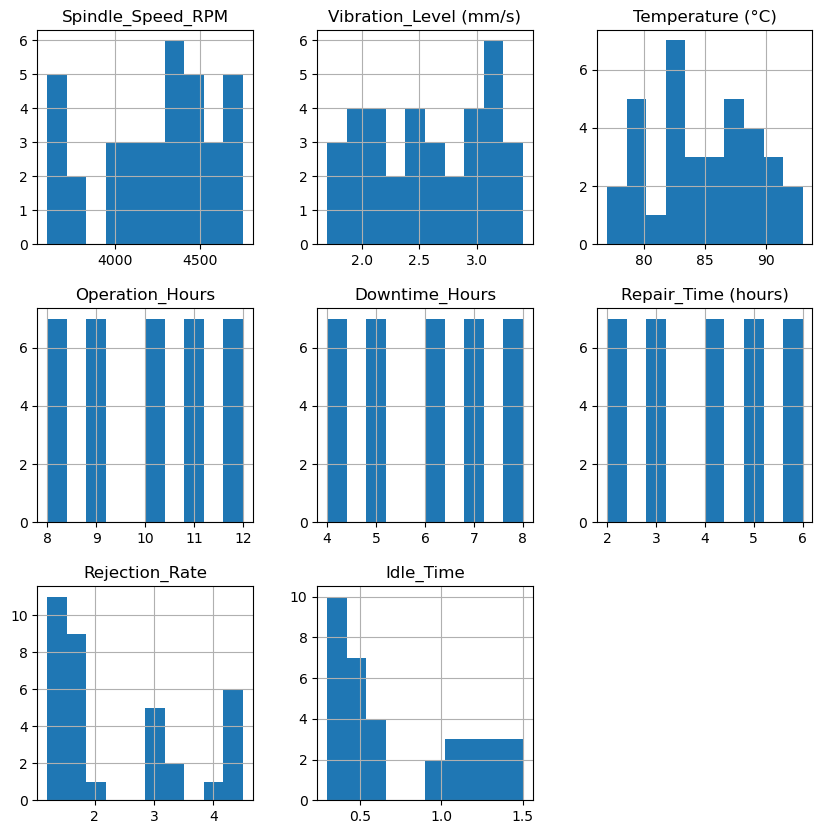

In [76]:
import matplotlib.pyplot as plt 
new_df.hist(figsize=(10,10))
plt.show()

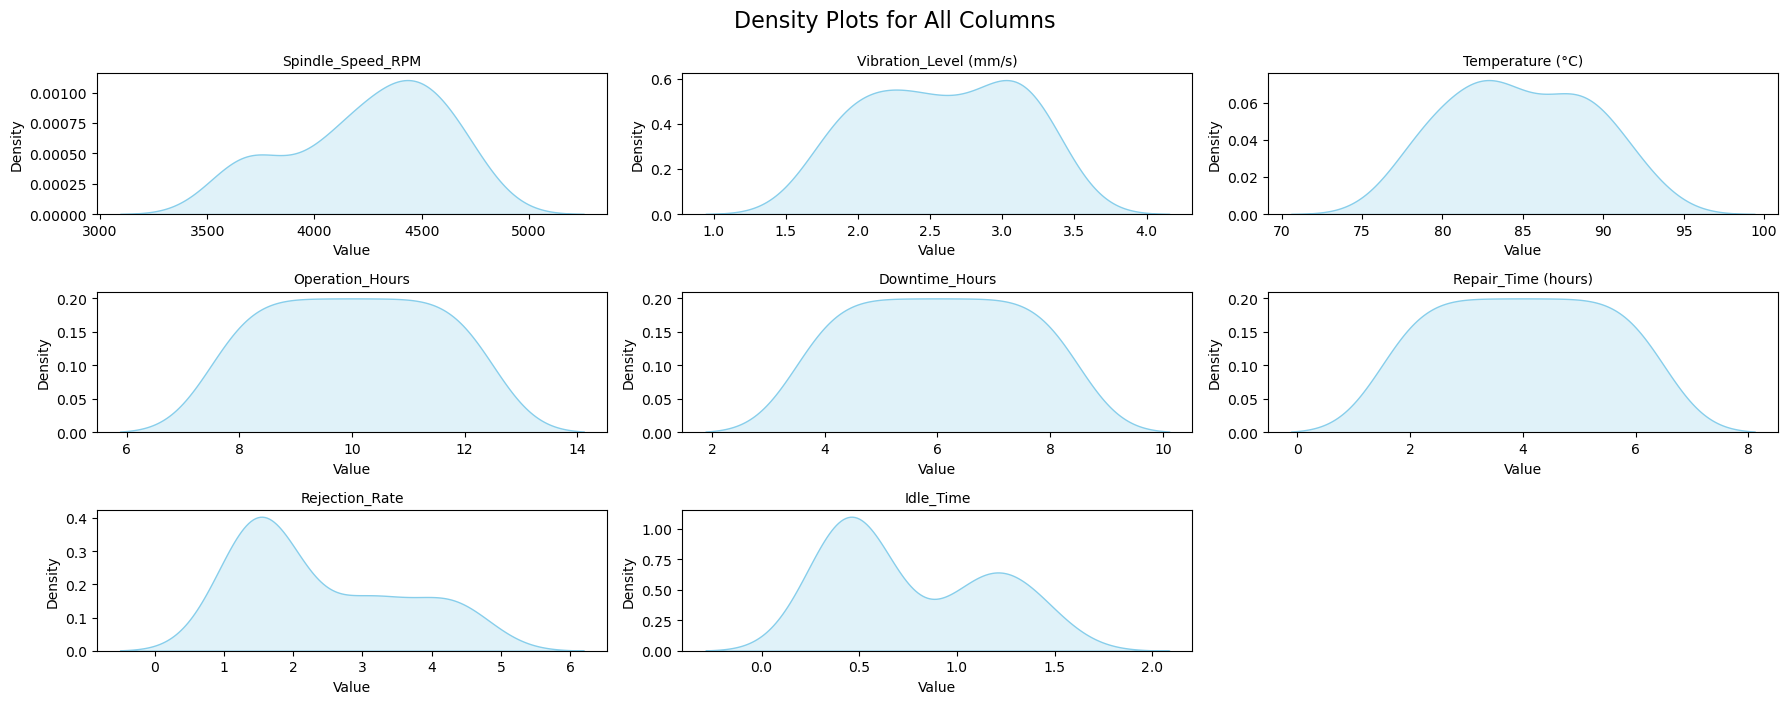

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up a grid of KDE plots
plt.figure(figsize=(18, 15))  # Define the overall figure size
index = 1  # Start index for subplot positioning

# Loop through each numeric column and plot its KDE
for column in new_df.columns:  # Iterate over column names
    plt.subplot(7, 3, index)  # Create a grid with 7 rows and 3 columns
    sns.kdeplot(data=new_df[column], fill=True, color="skyblue")  # Plot KDE
    plt.title(column, fontsize=10)  # Add a title for each subplot
    plt.xlabel("Value")  # Label the x-axis
    plt.ylabel("Density")  # Label the y-axis
    index += 1  # Increment the index for the next subplot

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle("Density Plots for All Columns", fontsize=16, y=1.02)
plt.show()

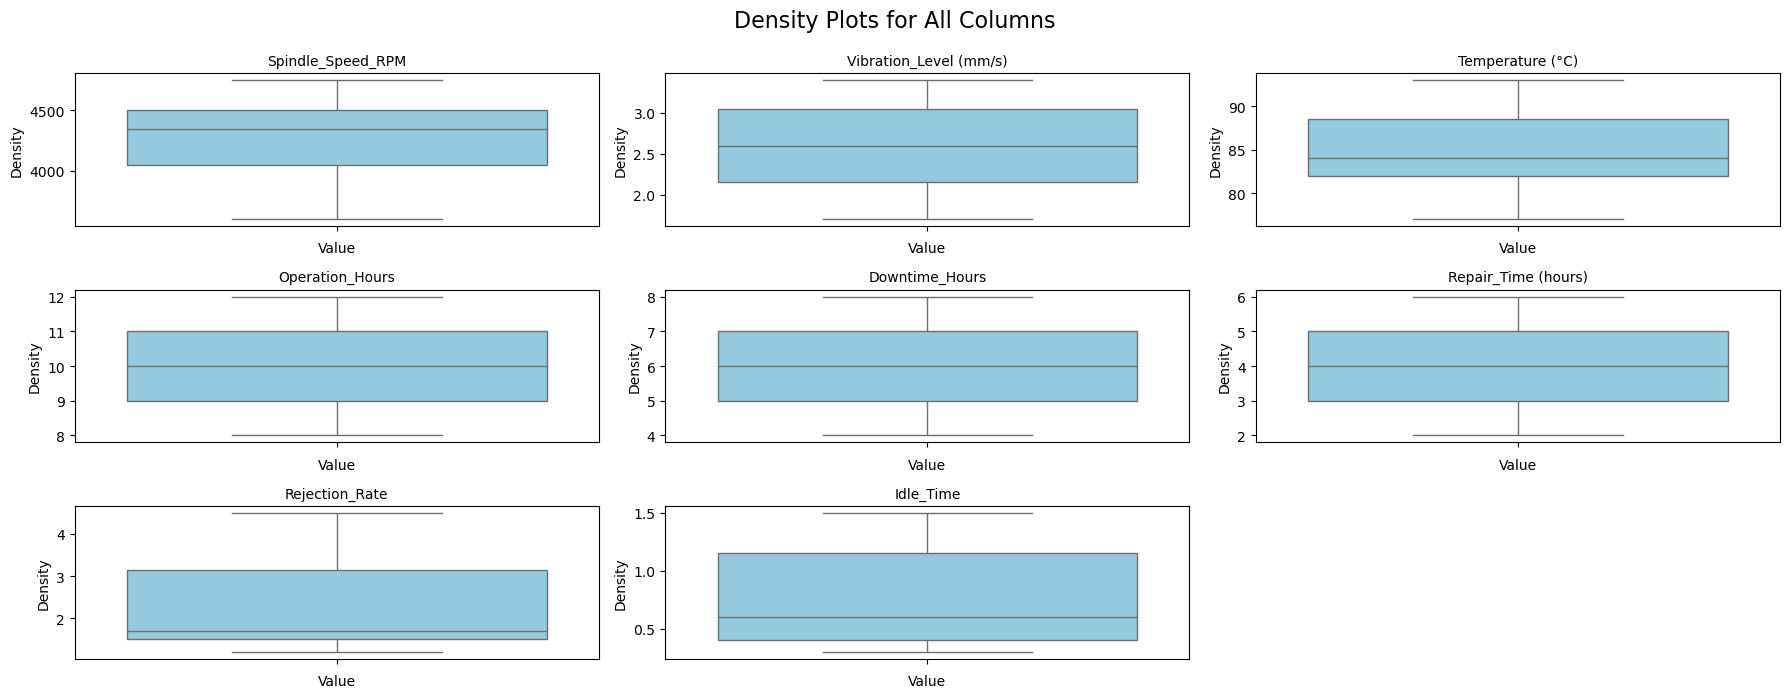

In [78]:
#to plot boxplot for outliers


# Set up a grid of boxplots
plt.figure(figsize=(18, 15))  # Define the overall figure size
index = 1  # Start index for subplot positioning

# Loop through each numeric column and plot its KDE
for column in new_df.columns:  # Iterate over column names
    plt.subplot(7, 3, index)  # Create a grid with 7 rows and 3 columns
    sns.boxplot(data=new_df[column], fill=True, color="skyblue")  # Plot KDE
    plt.title(column, fontsize=10)  # Add a title for each subplot
    plt.xlabel("Value")  # Label the x-axis
    plt.ylabel("Density")  # Label the y-axis
    index += 1  # Increment the index for the next subplot

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle("Density Plots for All Columns", fontsize=16, y=1.02)
plt.show()

--conclusion:
No outliers on data
1.	Spindle_Speed_RPM (Bimodal):
o	Likely indicates two machine states (e.g., high-speed vs. low-speed operation).
o	Action: Consider adding a binary or categorical feature to represent these states.
2.	Temperature (Unimodal and Normal-like):
o	Smooth distribution, easy for models to interpret.
o	Minimal preprocessing required unless outliers are present.
3.	Rejection_Rate (Bimodal):
o	May reflect two groups of production conditions (e.g., faulty and non-faulty machines).
o	Action: Consider separating the groups or clustering.
4.	Idle_Time (Right-Skewed):
o	Indicates most idle times are short, but some machines experience unusually long idle times.
o	Action: Transform the data to reduce skewness (e.g., log transformation).
________________________________________
Summary of Impact
•	Unimodal features: Typically easier to handle.
•	Bimodal features: May require clustering, feature engineering, or flexible models like decision trees or ensemble methods.
•	Skewed features: Apply transformations to reduce skewness.
•	Outliers: Address outliers to prevent distortion of model results.
By addressing these issues, you'll improve model performance and robustness!



categorical columns EDA
-->
-->
-->

EDA on categorical Columns

In [80]:
new_df_cat=df.filter(items=cat_columns)
print(new_df_cat)

   Machine_Status Predicted_Failure        Failure_Type    Maintenance_Type  \
0         Running                No       Motor Failure  Routine Inspection   
1         Running               Yes         Overheating   Vibration Control   
2         Running                No     Vibration Issue   Temperature Check   
3         Running               Yes  Electrical Failure   Electrical System   
4         Running               Yes   Spindle Breakdown  Spindle Inspection   
5         Running                No       Motor Failure  Routine Inspection   
6         Running               Yes         Overheating   Vibration Control   
7         Running                No     Vibration Issue   Temperature Check   
8         Running               Yes  Electrical Failure   Electrical System   
9         Running               Yes   Spindle Breakdown  Spindle Inspection   
10        Running                No       Motor Failure  Routine Inspection   
11        Running               Yes         Overheat

In [81]:
for i in cat_columns:
    print("******",i,"***********")
 
    print("value_counts ",df[i].value_counts())
    print()
    

****** Machine_Status ***********
value_counts  Machine_Status
Running    35
Name: count, dtype: int64

****** Predicted_Failure ***********
value_counts  Predicted_Failure
Yes    21
No     14
Name: count, dtype: int64

****** Failure_Type ***********
value_counts  Failure_Type
Motor Failure         7
Overheating           7
Vibration Issue       7
Electrical Failure    7
Spindle Breakdown     7
Name: count, dtype: int64

****** Maintenance_Type ***********
value_counts  Maintenance_Type
Routine Inspection    7
Vibration Control     7
Temperature Check     7
Electrical System     7
Spindle Inspection    7
Name: count, dtype: int64

****** Production_Quality ***********
value_counts  Production_Quality
High      21
Medium     7
Low        7
Name: count, dtype: int64



BIVARIATE ANALYSIS
NUMERICAL-NUMERICAL ANALYSIS

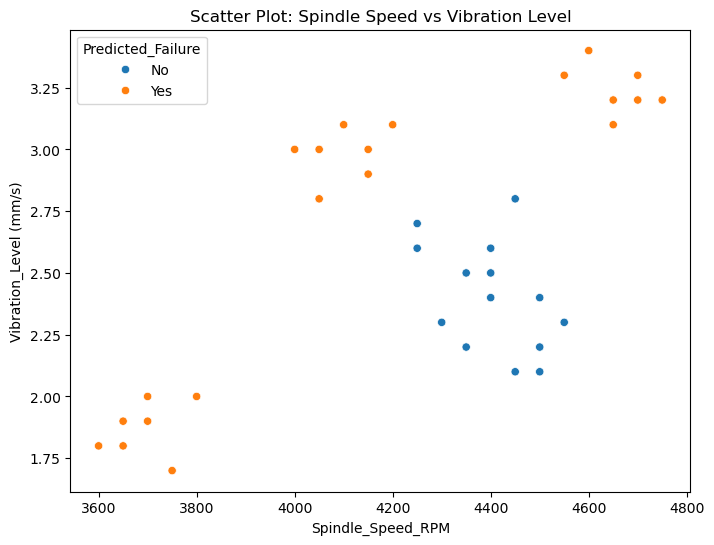

In [82]:
## bi variate analysis
## numerical-numerical analysis

# Scatter plot for Spindle_Speed_RPM vs Vibration_Level
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Spindle_Speed_RPM', y='Vibration_Level (mm/s)', hue='Predicted_Failure')
plt.title('Scatter Plot: Spindle Speed vs Vibration Level')
plt.show()

spindle_speed_rpm should be categorise into 4 categories
very low    3600 to 3800
low          3900 to 4225
high        4225 to 4500
very high   4600 to 4800

spindle_speed_rpm and vibration_level are correlated 
o	Noticeable clusters can be observed:
	Failures (orange points) seem to occur more frequently at higher Vibration Levels.
	Non-failures (blue points) are distributed more in areas with relatively moderate Spindle Speed and lower Vibration Levels.

vibration>2.95  high
vibration <2.95 low


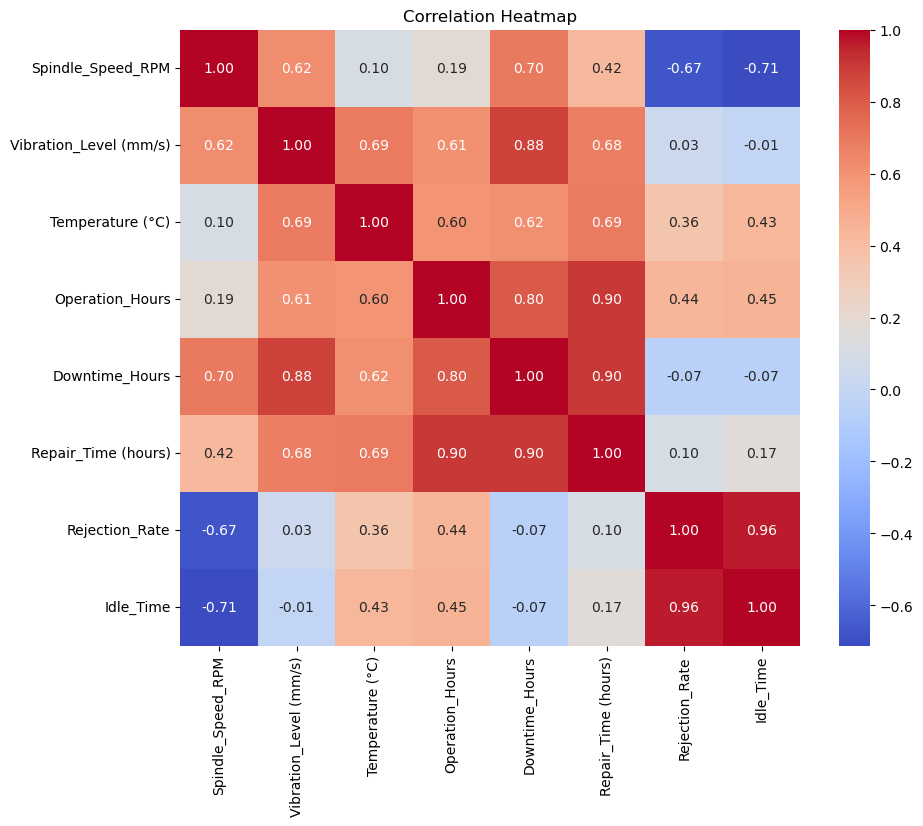

In [83]:
# Correlation matrix for numerical columns

correlation_matrix = df[num_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15084\1291237891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Production_Quality', y='Temperature (°C)', palette='Set3')


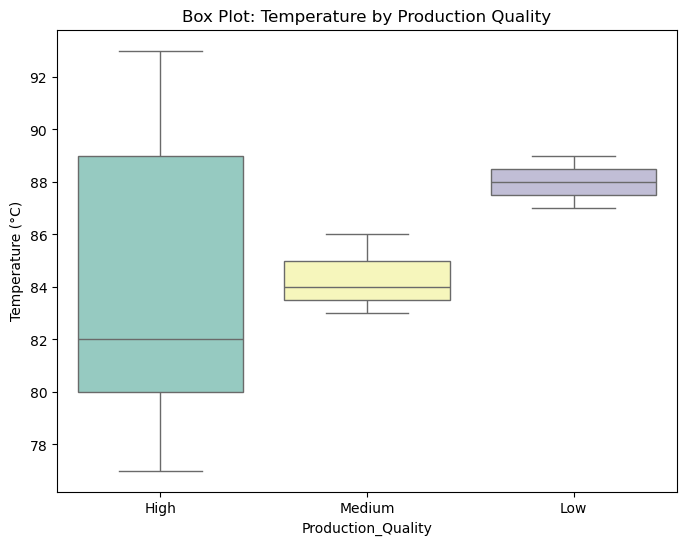

In [84]:
# Box plot for Temperature vs Production_Quality
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Production_Quality', y='Temperature (°C)', palette='Set3')
plt.title('Box Plot: Temperature by Production Quality')
plt.show()

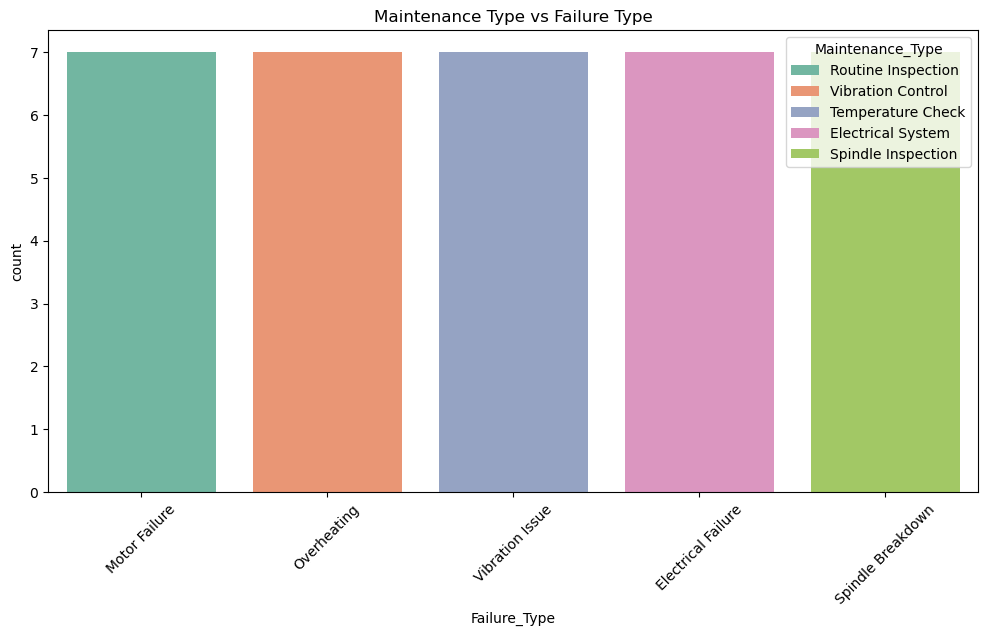

In [85]:
# Countplot for Maintenance_Type vs Failure_Type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Failure_Type', hue='Maintenance_Type', palette='Set2')
plt.title('Maintenance Type vs Failure Type')
plt.xticks(rotation=45)
plt.show()

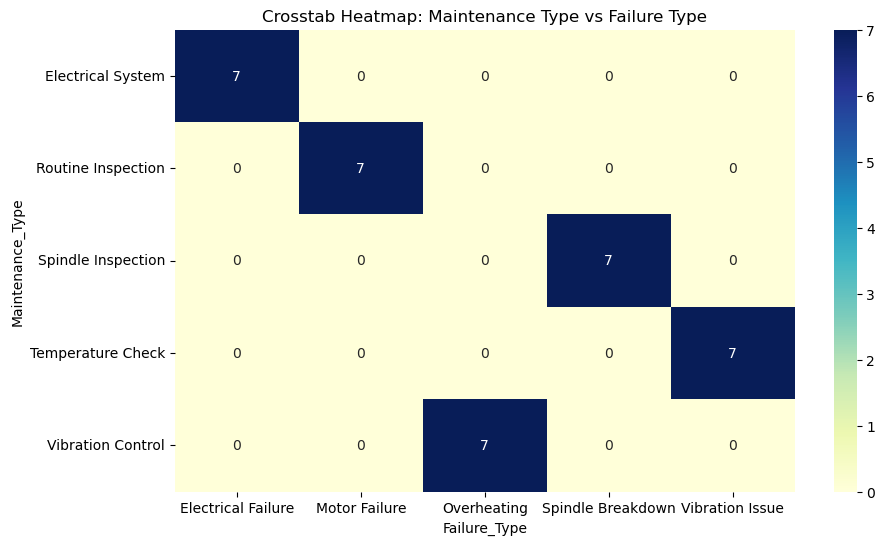

In [86]:
# Crosstab heatmap for Maintenance_Type and Failure_Type
crosstab = pd.crosstab(df['Maintenance_Type'], df['Failure_Type'])

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Crosstab Heatmap: Maintenance Type vs Failure Type')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15084\1539629934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Production_Quality', y='Idle_Time', palette='muted')


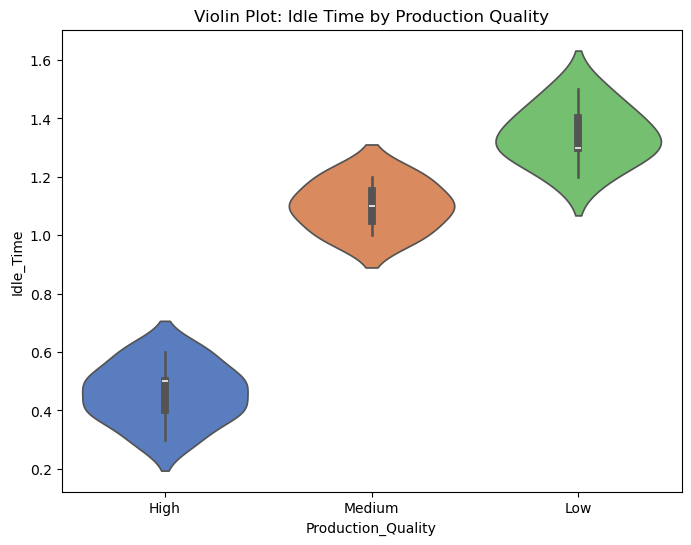

In [87]:
# Violin plot for Idle_Time by Production_Quality
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Production_Quality', y='Idle_Time', palette='muted')
plt.title('Violin Plot: Idle Time by Production Quality')
plt.show()

In [88]:
# Chi-Square Test for Categorical vs. Categorical
from scipy.stats import chi2_contingency

# Chi-square test for Maintenance_Type and Failure_Type
crosstab = pd.crosstab(df['Maintenance_Type'], df['Failure_Type'])
chi2, p, dof, expected = chi2_contingency(crosstab)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 139.99999999999997
P-value: 7.205427969278069e-22


For Numerical vs. Numerical:

Check the strength and direction of the relationship (positive/negative correlation).
Scatter plots can reveal trends or outliers.
For Numerical vs. Categorical:

Use box/violin plots to observe if categories have distinct distributions.
For Categorical vs. Categorical:

Crosstabs and heatmaps help understand relationships between two categorical features.
Chi-Square test can determine statistical significance.

FEATURE ENGINEERING


In [90]:
#feature engineering
df.columns



Index(['Machine_ID', 'Date', 'Spindle_Speed_RPM', 'Vibration_Level (mm/s)',
       'Temperature (°C)', 'Operation_Hours', 'Machine_Status',
       'Predicted_Failure', 'Failure_Date', 'Failure_Type', 'Downtime_Hours',
       'Repair_Time (hours)', 'Issue_Resolved_By', 'Comments',
       'Last_Maintenance_Date', 'Next_Schedule_Maintenance_Date',
       'Maintenance_Type', 'Technician_Name', 'Maintenance_Comments',
       'Usage_Date', 'Parts_Produced', 'Production_Quality', 'Rejection_Rate',
       'Idle_Time', 'Operation_name'],
      dtype='object')

In [24]:
df['Predicted_Failure'] = df['Predicted_Failure'].map({'Yes': 1, 'No': 0}).astype(int)

In [28]:

df['Production_Quality'] = df['Production_Quality'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [37]:
#date_columns=['Date', 'Failure_Date', 'Last_Maintenance_Date', 'Next_Schedule_Maintenance_Date', 'Usage_Date']
df['month_failure']=df['Failure_Date'].dt.month
df['maintain_failure_gap'] =(df['Last_Maintenance_Date']-df['Failure_Date']).dt.days
df['Days_Since_Last_Maintenance'] = (df['Date'] - df['Last_Maintenance_Date']).dt.days
df['Days_Until_Next_Maintenance'] = (df['Next_Schedule_Maintenance_Date'] - df['Date']).dt.days
df['Days_Between_Failure_And_Usage'] = (df['Usage_Date']-df['Failure_Date']).dt.days


In [38]:
df[['month_failure','maintain_failure_gap','Days_Since_Last_Maintenance','Days_Until_Next_Maintenance','Days_Between_Failure_And_Usage']] 

,month_failure,maintain_failure_gap,Days_Since_Last_Maintenance,Days_Until_Next_Maintenance,Days_Between_Failure_And_Usage
0,8,-16,31,14,15
1,8,-19,30,15,11
2,8,0,21,20,21
3,7,7,27,17,34
4,8,10,19,21,29
5,8,-12,30,12,18
6,8,-16,26,15,10
7,8,-4,24,17,20
8,7,9,27,16,36
9,8,8,23,18,31


In [40]:
df.sample(5)

,Machine_ID,Date,Spindle_Speed_RPM,Vibration_Level (mm/s),Temperature (°C),Operation_Hours,Machine_Status,Predicted_Failure,Failure_Date,Failure_Type,...,Parts_Produced,Production_Quality,Rejection_Rate,Idle_Time,Operation_name,month_failure,maintain_failure_gap,Days_Since_Last_Maintenance,Days_Until_Next_Maintenance,Days_Between_Failure_And_Usage
4,CNC010,2024-09-02,4700.0,3.2,91.0,11.0,Running,1,2024-08-04,Spindle Breakdown,...,158.0,2,1.6,0.5,Operator J,8,10,19,21,29
33,CNC039,2024-09-08,4150.0,2.9,89.0,12.0,Running,1,2024-07-31,Electrical Failure,...,138.0,0,4.5,1.3,Operator M,7,7,32,14,39
23,CNC029,2024-09-06,4200.0,3.1,87.0,12.0,Running,1,2024-07-28,Electrical Failure,...,140.0,0,4.3,1.2,Operator C,7,9,31,13,40
6,CNC012,2024-09-03,3650.0,1.9,83.0,9.0,Running,1,2024-08-24,Overheating,...,135.0,1,3.1,1.0,Operator L,8,-16,26,15,10
27,CNC033,2024-09-07,4450.0,2.8,82.0,8.0,Running,0,2024-08-14,Vibration Issue,...,166.0,2,1.9,0.5,Operator G,8,-4,28,13,24


In [42]:
df.columns

Index(['Machine_ID', 'Date', 'Spindle_Speed_RPM', 'Vibration_Level (mm/s)',
       'Temperature (°C)', 'Operation_Hours', 'Machine_Status',
       'Predicted_Failure', 'Failure_Date', 'Failure_Type', 'Downtime_Hours',
       'Repair_Time (hours)', 'Issue_Resolved_By', 'Comments',
       'Last_Maintenance_Date', 'Next_Schedule_Maintenance_Date',
       'Maintenance_Type', 'Technician_Name', 'Maintenance_Comments',
       'Usage_Date', 'Parts_Produced', 'Production_Quality', 'Rejection_Rate',
       'Idle_Time', 'Operation_name', 'month_failure', 'maintain_failure_gap',
       'Days_Since_Last_Maintenance', 'Days_Until_Next_Maintenance',
       'Days_Between_Failure_And_Usage'],
      dtype='object')

In [45]:
df= df.drop(columns=['Machine_ID', 'Date', 'Machine_Status','Technician_Name', 'Comments','Maintenance_Comments',
 'Failure_Date','Last_Maintenance_Date','Next_Schedule_Maintenance_Date','Usage_Date','Operation_name'])

In [46]:
df.columns

Index(['Spindle_Speed_RPM', 'Vibration_Level (mm/s)', 'Temperature (°C)',
       'Operation_Hours', 'Predicted_Failure', 'Failure_Type',
       'Downtime_Hours', 'Repair_Time (hours)', 'Issue_Resolved_By',
       'Maintenance_Type', 'Parts_Produced', 'Production_Quality',
       'Rejection_Rate', 'Idle_Time', 'month_failure', 'maintain_failure_gap',
       'Days_Since_Last_Maintenance', 'Days_Until_Next_Maintenance',
       'Days_Between_Failure_And_Usage'],
      dtype='object')

In [47]:
df.describe()

,Spindle_Speed_RPM,Vibration_Level (mm/s),Temperature (°C),Operation_Hours,Predicted_Failure,Downtime_Hours,Repair_Time (hours),Parts_Produced,Production_Quality,Rejection_Rate,Idle_Time,month_failure,maintain_failure_gap,Days_Since_Last_Maintenance,Days_Until_Next_Maintenance,Days_Between_Failure_And_Usage
count,35.000000,35.000000,35.000000,35.00000,35.00000,35.00000,35.00000,35.000000,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000
mean,4251.428571,2.582857,84.828571,10.00000,0.60000,6.00000,4.00000,149.514286,1.400000,2.391429,0.762857,7.80000,-3.142857,27.857143,15.285714,24.714286
std,343.957443,0.514202,4.362175,1.43486,0.49705,1.43486,1.43486,10.413146,0.811679,1.152075,0.398590,0.40584,11.453597,4.697577,3.409083,9.748519
min,3600.000000,1.700000,77.000000,8.00000,0.00000,4.00000,2.00000,133.000000,0.000000,1.200000,0.300000,7.00000,-20.000000,19.000000,9.000000,10.000000
25%,4050.000000,2.150000,82.000000,9.00000,0.00000,5.00000,3.00000,139.500000,1.000000,1.500000,0.400000,8.00000,-14.000000,24.000000,13.000000,16.500000
50%,4350.000000,2.600000,84.000000,10.00000,1.00000,6.00000,4.00000,151.000000,2.000000,1.700000,0.600000,8.00000,-4.000000,27.000000,15.000000,23.000000
75%,4500.000000,3.050000,88.500000,11.00000,1.00000,7.00000,5.00000,157.500000,2.000000,3.150000,1.150000,8.00000,8.500000,31.000000,17.500000,34.000000
max,4750.000000,3.400000,93.000000,12.00000,1.00000,8.00000,6.00000,167.000000,2.000000,4.500000,1.500000,8.00000,13.000000,36.000000,22.000000,40.000000


In [56]:
df.nunique()

Spindle_Speed_RPM                 21
Vibration_Level (mm/s)            18
Temperature (°C)                  17
Operation_Hours                    5
Predicted_Failure                  2
Failure_Type                       5
Downtime_Hours                     5
Repair_Time (hours)                5
Issue_Resolved_By                 26
Maintenance_Type                   5
Parts_Produced                    31
Production_Quality                 3
Rejection_Rate                    18
Idle_Time                         10
month_failure                      2
maintain_failure_gap              16
Days_Since_Last_Maintenance       17
Days_Until_Next_Maintenance       14
Days_Between_Failure_And_Usage    22
dtype: int64

In [61]:
# One-hot encoding using pandas
code_columns=['Issue_Resolved_By','Failure_Type','Maintenance_Type']
one_hot_encoded_df = pd.get_dummies(df, columns=code_columns,dtype=int)

print("One-Hot Encoded DataFrame:")
print(one_hot_encoded_df)

One-Hot Encoded DataFrame:
    Spindle_Speed_RPM  Vibration_Level (mm/s)  Temperature (°C)  \
0              4300.0                     2.3              79.0   
1              3700.0                     2.0              84.0   
2              4400.0                     2.4              82.0   
3              4000.0                     3.0              88.0   
4              4700.0                     3.2              91.0   
5              4500.0                     2.2              80.0   
6              3650.0                     1.9              83.0   
7              4250.0                     2.6              84.0   
8              4050.0                     2.8              89.0   
9              4550.0                     3.3              93.0   
10             4450.0                     2.1              77.0   
11             3750.0                     1.7              86.0   
12             4350.0                     2.5              83.0   
13             4150.0              

In [71]:
y=one_hot_encoded_df['Predicted_Failure']
x=one_hot_encoded_df.drop('Predicted_Failure',axis=1)

In [73]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(x)

# Create a DataFrame for scaled data
scaled_df = pd.DataFrame(scaled_data, columns=x.columns)


In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
x_pca = pca.fit_transform(scaled_df)
print("Number of components after PCA:", pca.n_components_)

Number of components after PCA: 10


In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca , y, test_size=0.2, random_state=42)

In [86]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)




RandomForestClassifier()

In [87]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix

y_pred = model.predict(x_test)
print("**********************accuracy score ************************")
print(accuracy_score(y_test, y_pred))
print("**********************confusion matrix ************************")
print(confusion_matrix(y_test, y_pred))
print("**********************classification report ************************")
print(classification_report(y_test, y_pred))



**********************accuracy score ************************
1.0
**********************confusion matrix ************************
[[1 0]
 [0 6]]
**********************classification report ************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [88]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("**********************accuracy score ************************")
print(accuracy_score(y_test, y_pred))
print("**********************confusion matrix ************************")
print(confusion_matrix(y_test, y_pred))
print("**********************classification report ************************")
print(classification_report(y_test, y_pred))



**********************accuracy score ************************
1.0
**********************confusion matrix ************************
[[1 0]
 [0 6]]
**********************classification report ************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [90]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
grid_search.fit(x_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best F1-Score: 1.0


**********************accuracy score ************************
1.0
**********************confusion matrix ************************
[[1 0]
 [0 6]]
**********************classification report ************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



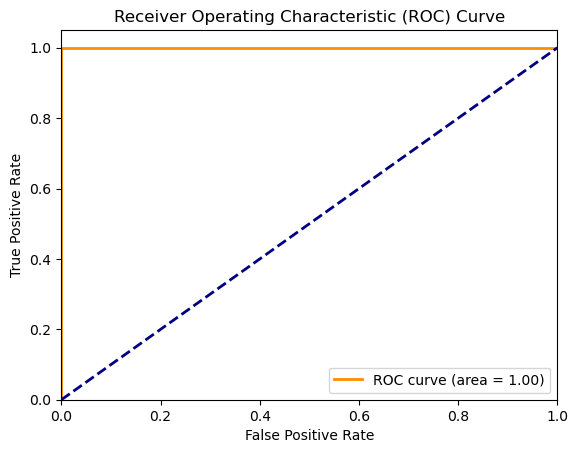

In [94]:
from sklearn.ensemble import VotingClassifier,GradientBoostingClassifier

voting_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
], voting='soft')

voting_model.fit(x_train, y_train)
y_pred_voting = voting_model.predict(x_test)
print("**********************accuracy score ************************")
print(accuracy_score(y_test, y_pred))
print("**********************confusion matrix ************************")
print(confusion_matrix(y_test, y_pred))
print("**********************classification report ************************")
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, voting_model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
